# Fractals using Julia

Notebook from [HelloJulia.jl](https://github.com/ablaom/HelloJulia.jl)

Instantiate package environment:

In [1]:
using Pkg
Pkg.activate(joinpath(@__DIR__, "..", ".."))
Pkg.instantiate()

  Activating project at `~/GoogleDrive/Julia/HelloJulia`


Load plotting package and set in-line display type:

In [2]:
using CairoMakie
CairoMakie.activate!(type = "png")

To plot the famous Mandelbrot set, we need to apply the following function millions of
times:

In [3]:
function mandelbrot(z)
    c = z     # starting value and constant shift
    max_iterations = 20
    for n = 1:max_iterations
        if abs(z) > 2
            return n-1
        end
        z = z^2 + c
    end
    return max_iterations
end

mandelbrot (generic function with 1 method)

Let's see how long it takes to apply it just once:

In [4]:
@time @eval mandelbrot(0.5)

  0.009891 seconds (5.28 k allocations: 332.234 KiB, 98.28% compilation time)


4

Slow!! Why? Because Julia is a *compiled* language and does not
compile new code until it knows the type of arguments you want to
use. (The use of the macro `@eval` helps us to include this
compilation time in the total measurement, since `@time` is designed
to cleverly exclude it in recent Julia versions.)

Let's try again *with the same type* of argument:

In [5]:
@time @eval mandelbrot(0.6)

  0.000145 seconds (43 allocations: 2.109 KiB)


3

Fast!!! Why? Because Julia caches the compiled code and the types
are the same.

If we call with a new argument type (complex instead of float) we'll incur a compilation
delay once more:

In [6]:
@time @eval mandelbrot(0.6 + im*0.1)

  0.035204 seconds (26.63 k allocations: 1.729 MiB, 99.02% compilation time)


3

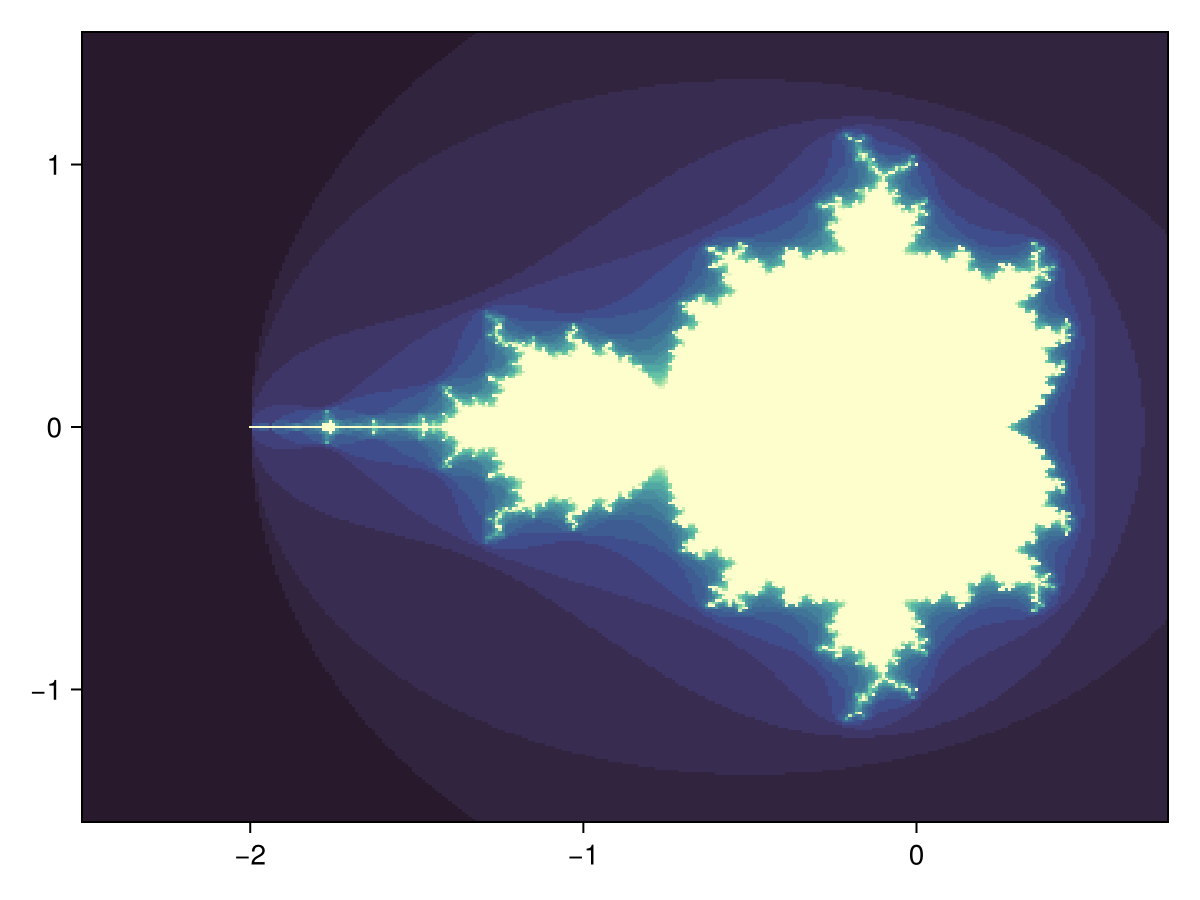

In [7]:
xs = -2.5:0.01:0.75
ys = -1.5:0.01:1.5

fig = heatmap(xs, ys, (x, y) -> mandelbrot(x + im*y),
        colormap = Reverse(:deep))

In [8]:
save("mandelbrot.png", fig);

![](mandelbrot.png)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*